# Dependencies

In [1]:
# import dependenciesimport numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading Data

In [2]:
# Import the data into a dataframe
file = "Resources/lending_data.csv"
df = pd.read_csv(file)
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [3]:
# check for any null data
df.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

No null data in the dataset

# Split and Review Data

In [4]:
# split the Data into X and y - note that the target is the loan_status so that is defined as y
X = df.drop("loan_status", axis = 1)
y = df["loan_status"]

In [5]:
# look at the shape and resulting data after splitting
X.shape

(77536, 7)

In [6]:
# look at the shape and resulting data after splitting
y.shape

(77536,)

In [7]:
# look at the shape and resulting data after splitting
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [8]:
# look at the shape and resulting data after splitting
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='total_debt', ylabel='borrower_income'>

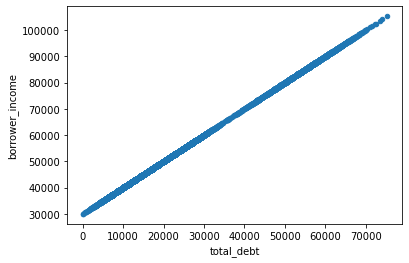

In [9]:
# look at random plots of the parameters to see if looks noisy or linear
df.plot.scatter("total_debt", "borrower_income")

# Prediction
Since the values numerically range significantly, a Logistic Regression will be better suited to achieve a higher score. The numerical values will cause the Random Forest Classifier to not perform as well, but would potenitally improve if the data were scaled which the Logistic Regression does not require. Also since the data doesn't seem to have paramaters that are too noisy, I believe the Logistic Regression will perform well. Many of the parameters seem to be linearlly correlated, so the LogisticRegression will perform well due to the linear algorithims that it utilizes.



# Fit Logistic Regression Model

In [10]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [11]:
# code for scaling data, not needed, but can uncomment the code to see what results would be, need to make sure to use....
# X_train_scaled, and X_test_scaled in lieu of X_train and X_test where applicable
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [12]:
# Train a Logistic Regression model print the model score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf

LogisticRegression()

In [13]:
# fit the logisticregression model
clf.fit(X_train, y_train)

LogisticRegression()

In [14]:
# score the training and test models and print the scores
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


# Fit Random Forest Model

In [15]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [16]:
# instantiate and fit the Random Forest model
clf_trees = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)

In [17]:
# print the scores for the training and test models
print(f"Training Data Score: {clf_trees.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_trees.score(X_test, y_test)}")

Training Data Score: 0.9975409272252029
Testing Data Score: 0.991642591828312


# Reflection

The Logistic Regression provided a Training score of 99.21% and test score of 99.18%. The Random Forest Classifier provided a Training score of 99.75% and test score of 99.16%. The Random Forest Model performs only slightly better, but it takes a bit longer to perform the model fitting. Since both models return very high accuracies, it may be better to use the Logistic Regression in the long run because it is quicker to perform and achieves very similar results to the Random Tree Classifier.